Step 1: Import Libraries and Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Amazon 2_Raw.xlsx'  
data = pd.read_excel(file_path)



In [6]:
# Display the first few rows of the dataframe
data.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


Step 2: Clean and Preprocess Data

In [7]:
# Handle missing values
data = data.dropna()

In [8]:
# Remove duplicates
data = data.drop_duplicates()

In [9]:
# Convert data types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])


In [10]:
# Extract useful information
data[['Country', 'City', 'State']] = data['Geography'].str.split(',', expand=True)

# Extract Month and Year from Order Date
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Display the cleaned dataframe
data.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Country,City,State,Order Month,Order Year
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,6,2011
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,6,2011
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,6,2011
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,6,2011


Step 3: Conduct Exploratory Data Analysis (EDA)

In [11]:
# Descriptive statistics
data.describe()

,Order Date,Ship Date,Sales,Quantity,Profit,Order Month,Order Year
count,3203,3203,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032,8.025289,2012.729941
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000,1.000000,2011.000000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000,5.000000,2012.000000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400,9.000000,2013.000000
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400,11.000000,2014.000000
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800,12.000000,2014.000000
std,NaN,NaN,524.876877,2.260947,174.109081,3.254793,1.138640


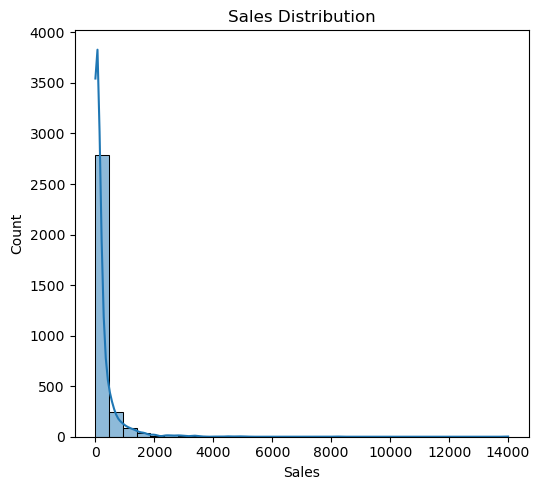

In [13]:
plt.figure(figsize=(15, 5))

# Sales distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()


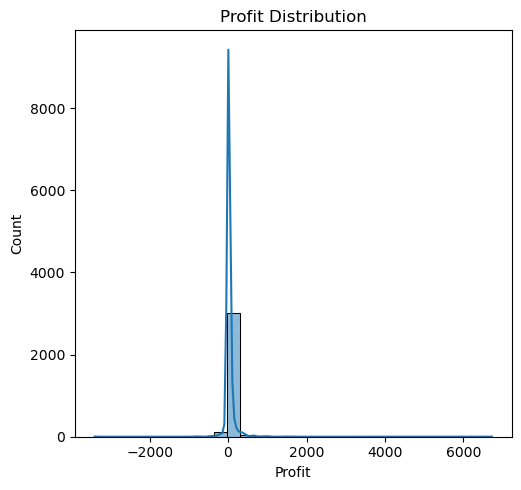

In [14]:
plt.figure(figsize=(15, 5))
# Profit distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.tight_layout()
plt.show()


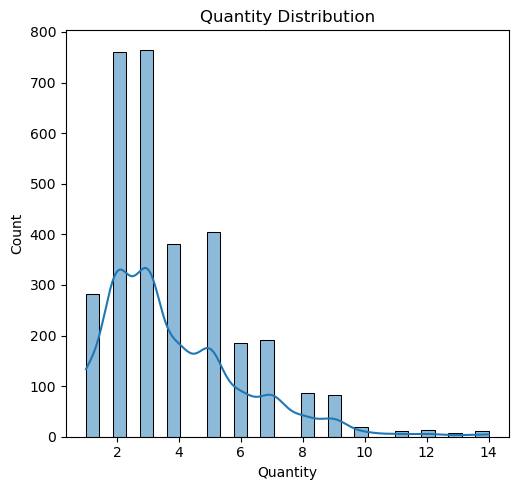

In [15]:
plt.figure(figsize=(15, 5))
# Quantity distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.tight_layout()
plt.show()

Step 4: Draw Conclusions and Insights

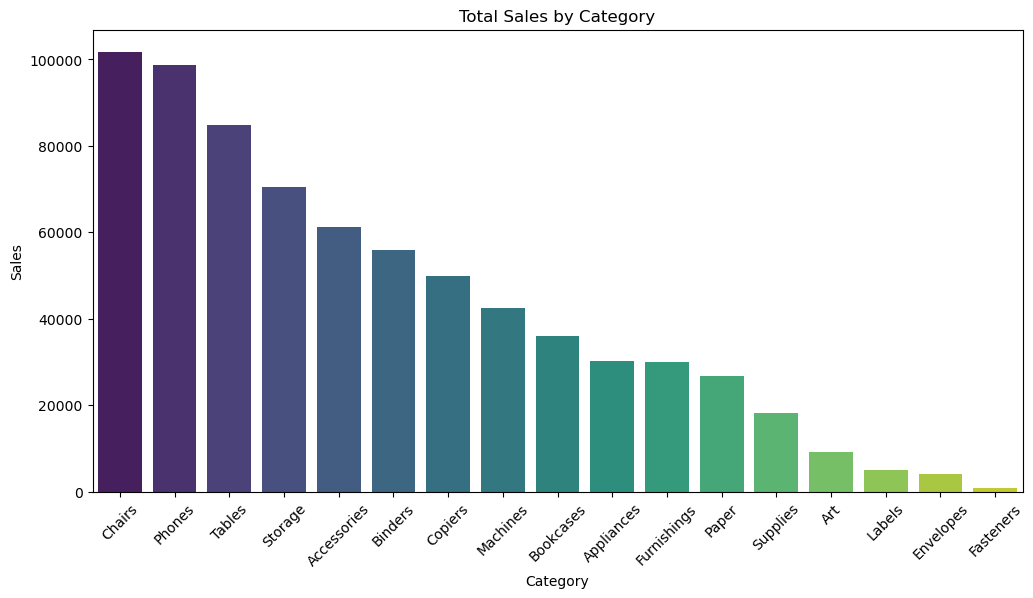

In [17]:
# Sales and profit by category
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales_profit.index, y=category_sales_profit['Sales'], palette='viridis')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()



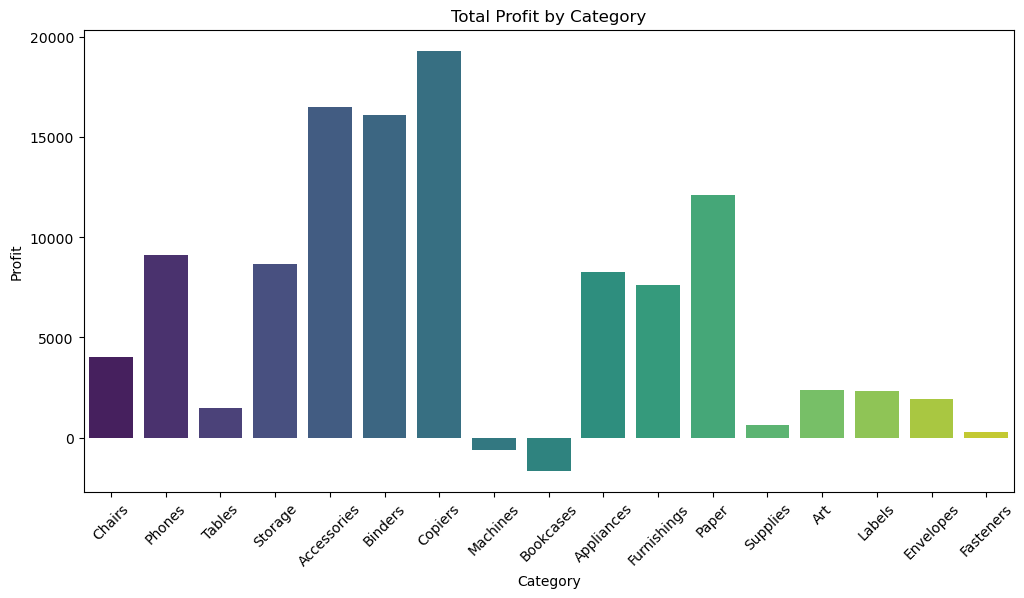

In [19]:
# Sales and profit by category
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
# Plot profit by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales_profit.index, y=category_sales_profit['Profit'], palette='viridis')
plt.title('Total Profit by Category')
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.xlabel('Category')
plt.show()

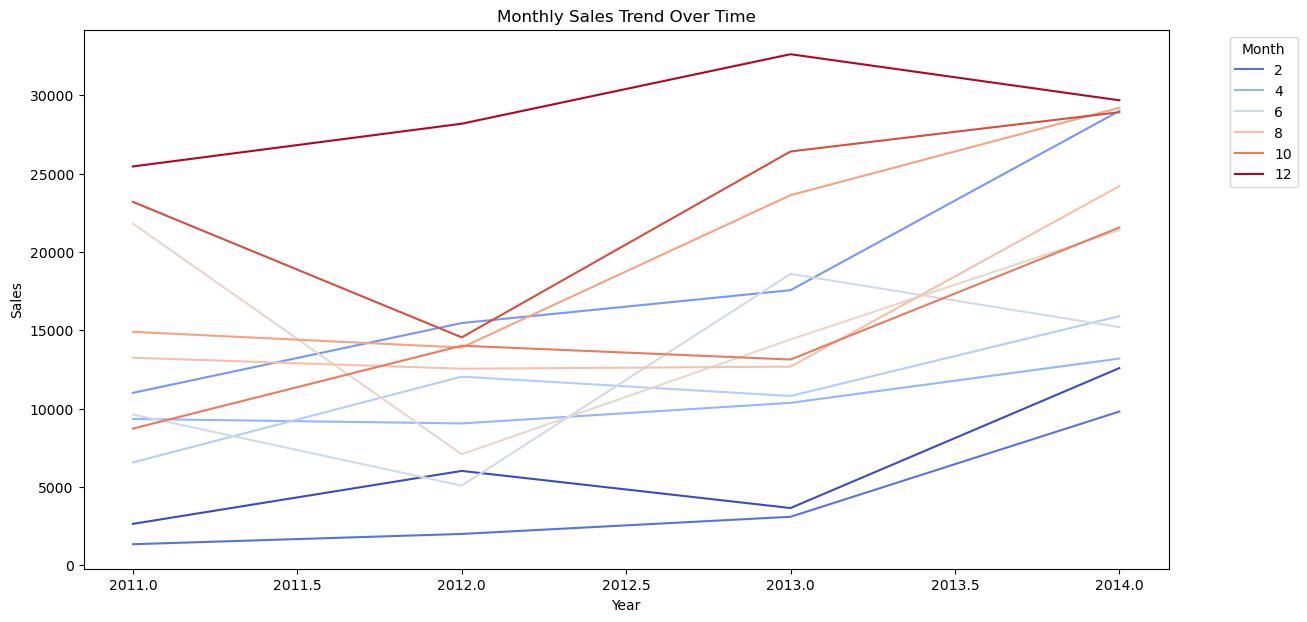

In [21]:
# Trend of sales and profit over time
monthly_sales_profit = data.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()

# Plot trend of sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Year', y='Sales', hue='Order Month', data=monthly_sales_profit, palette='coolwarm')
plt.title('Monthly Sales Trend Over Time')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




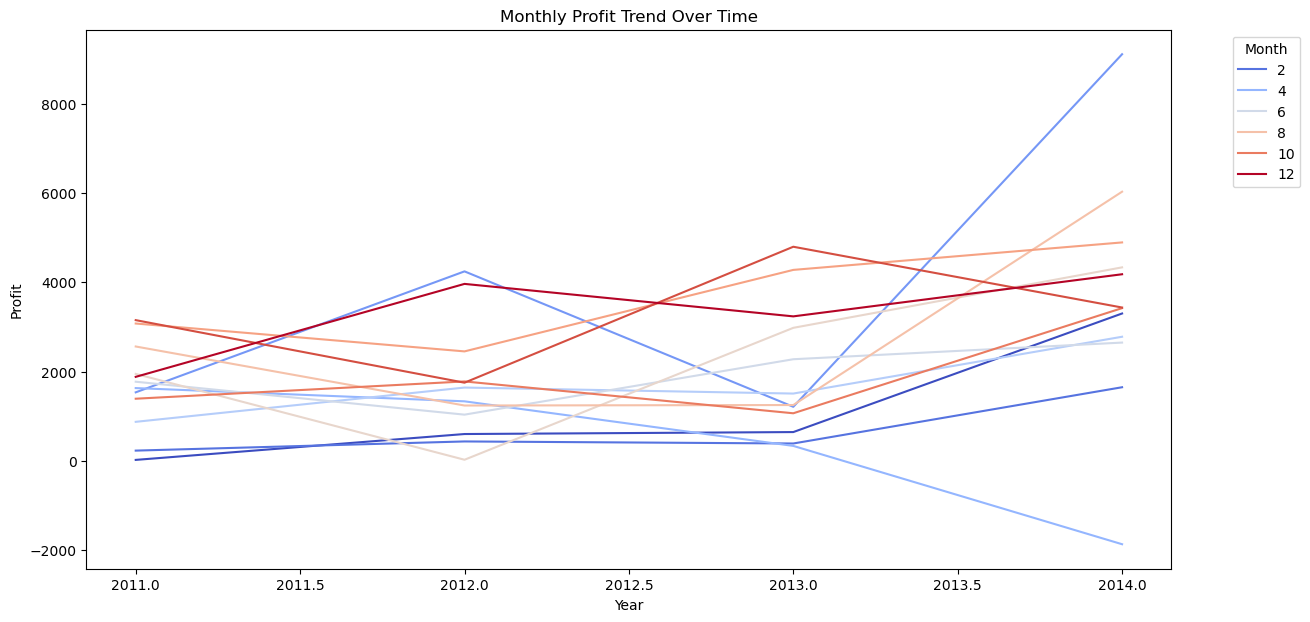

In [22]:
# Plot trend of profit over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Year', y='Profit', hue='Order Month', data=monthly_sales_profit, palette='coolwarm')
plt.title('Monthly Profit Trend Over Time')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Best Month for Sales

In [33]:
# Group by month and year to find total sales for each month
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Identify the best month for sales
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]

# Display the result
best_month



Order Year      2013.00
Order Month       12.00
Sales          32617.34
Name: 35, dtype: float64

City with the Most Product Sales

In [24]:
# Group by city to find total sales for each city
city_sales = data.groupby('City')['Sales'].sum().reset_index()

# Identify the city with the most product sales
top_city = city_sales.loc[city_sales['Sales'].idxmax()]

# Display the result
top_city


City     Los Angeles
Sales     175851.341
Name: 80, dtype: object

Optimal Advertisement Timing

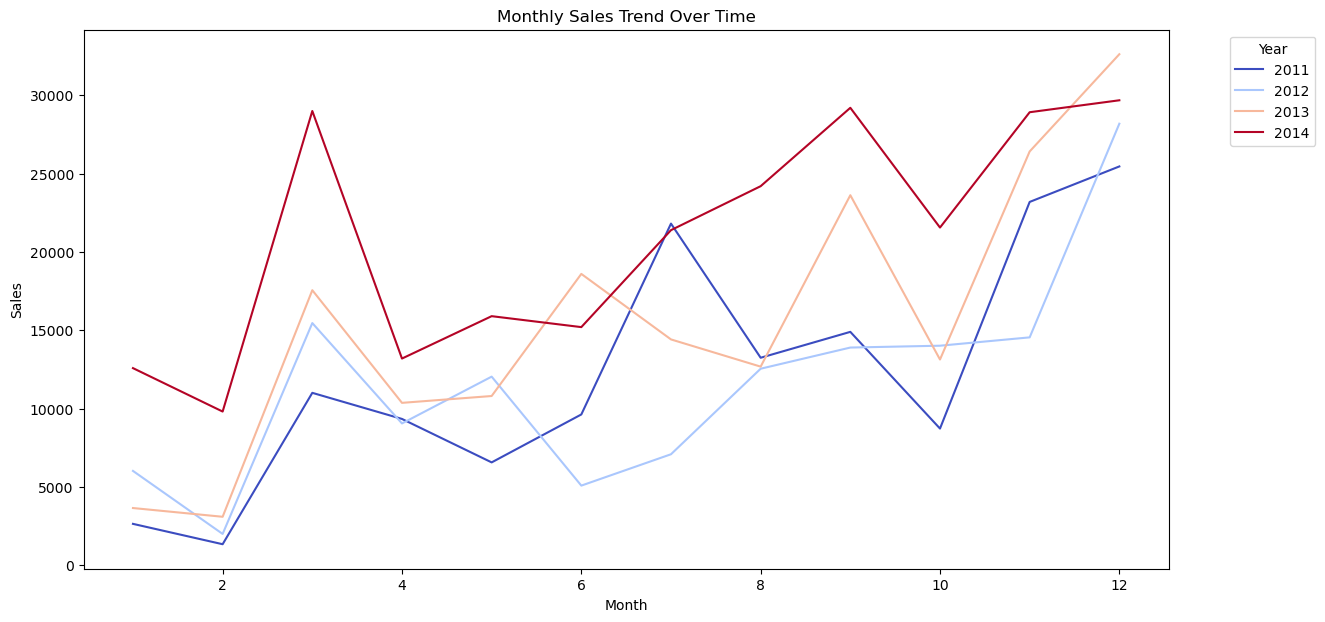

In [25]:
# Group by month and year to find total sales for each month
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Plot the sales trend over months and years to identify peak times
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=monthly_sales, palette='coolwarm')
plt.title('Monthly Sales Trend Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Products Sold Together

In [26]:
# This analysis requires a different approach, usually involving market basket analysis or association rules mining.
# Simplifying for this dataset:

# Group by Order ID and count occurrences of each product
order_products = data.groupby('Order ID')['Product Name'].apply(list)

# Count pairs of products sold together
from collections import Counter
from itertools import combinations

product_pairs = Counter()
for products in order_products:
    product_pairs.update(Counter(combinations(products, 2)))

# Display the most common product pairs
product_pairs.most_common(10)


[(('Staples', 'Tennsco Regal Shelving Units'), 2),
 (('Staples', 'Staples'), 2),
 (('Staples', 'Advantus Rolling Storage Box'), 2),
 (('Staples', 'GBC VeloBind Cover Sets'), 2),
 (('Advantus Rolling Storage Box',
   'Great White Multi-Use Recycled Paper (20Lb. and 84 Bright)'),
  2),
 (('Newell 344', 'Memorex Micro Travel Drive 16 GB'), 2),
 (('Memorex Micro Travel Drive 16 GB',
   'Wirebound Four 2-3/4 x 5 Forms per Page, 400 Sets per Book'),
  2),
 (('Memorex Micro Travel Drive 16 GB', 'Elite 5" Scissors'), 2),
 (('Memorex Micro Travel Drive 16 GB', 'Staples'), 2),
 (('Memorex Micro Travel Drive 16 GB',
   'Eldon Image Series Desk Accessories, Burgundy'),
  2)]

Top-Selling Product

In [27]:
# Group by product to find total sales for each product
product_sales = data.groupby('Product Name')['Sales'].sum().reset_index()

# Identify the top-selling product
top_product = product_sales.loc[product_sales['Sales'].idxmax()]

# Display the result
top_product


Product Name    Canon imageCLASS 2200 Advanced Copier
Sales                                        13999.96
Name: 328, dtype: object

Least Selling Product by Category and Brand

In [28]:
# Assuming there are columns for Category and Brand (if not, update accordingly)
# Group by category and product to find total sales for each product in each category
category_product_sales = data.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()

# Identify the least selling product in each category
least_selling_products = category_product_sales.loc[category_product_sales.groupby('Category')['Sales'].idxmin()]

# Display the result
least_selling_products


,Category,Product Name,Sales
65,Accessories,Maxell 4.7GB DVD-R 5/Pack,8.910
147,Appliances,Eureka Sanitaire Multi-Pro Heavy-Duty Upright...,17.480
220,Art,Design Ebony Sketching Pencil,4.170
482,Binders,Wilson Jones DublLock D-Ring Binders,2.025
505,Bookcases,"Bush Cubix Collection Bookcases, Fully Assembled",66.294
568,Chairs,"Global Push Button Manager's Chair, Indigo",48.712
624,Copiers,Canon PC-428 Personal Copier,1119.944
638,Envelopes,#6 3/4 Gummed Flap White Envelopes,7.920
681,Fasteners,Colored Push Pins,1.810
789,Furnishings,G.E. Halogen Desk Lamp Bulbs,6.980


Ratings Distribution

In [31]:
# Replace 'Ratings' with the correct column name for ratings
# If there is no ratings column, this part of the analysis cannot be performed
if 'Ratings' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Ratings'], bins=10, kde=True)
    plt.title('Ratings Distribution')
    plt.xlabel('Ratings')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No Ratings column found in the dataset.")


No Ratings column found in the dataset.


Best Rated Brands

In [32]:
# Replace 'Ratings' and 'Brand' with the correct column names
# If there is no ratings or brand column, this part of the analysis cannot be performed
if 'Ratings' in data.columns and 'Brand' in data.columns:
    # Group by brand to find the average rating for each brand
    brand_ratings = data.groupby('Brand')['Ratings'].mean().reset_index()

    # Identify the best rated brands
    top_brands = brand_ratings.sort_values(by='Ratings', ascending=False).head(10)

    # Display the result
    top_brands
else:
    print("No Ratings or Brand column found in the dataset.")


No Ratings or Brand column found in the dataset.
